# Network Optimization

Notebook author: Andi Dinata

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Setup Node, Edge and Weight

In [2]:
G = nx.Graph()
G.add_edges_from(
    [
        ("O", "A", {"weight": 2}),
        ("O", "B", {"weight": 5}),
        ("O", "C", {"weight": 4}),
        ("A", "B", {"weight": 2}),
        ("A", "D", {"weight": 7}),
        ("B", "D", {"weight": 4}),
        ("B", "E", {"weight": 3}),
        ("C", "B", {"weight": 1}),
        ("C", "E", {"weight": 4}),
        ("D", "T", {"weight": 5}),
        ("E", "D", {"weight": 1}),
        ("E", "T", {"weight": 7})
    ]
)

In [3]:
G.number_of_nodes()

7

In [4]:
G.number_of_edges()

12

### Visualize

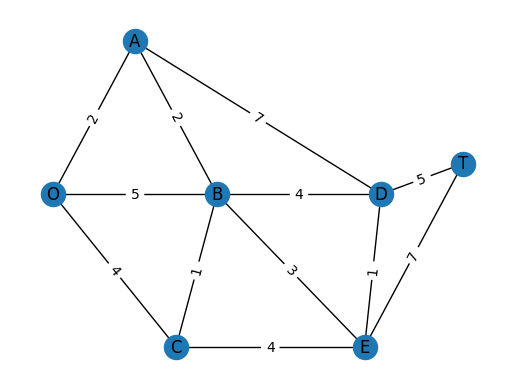

In [21]:
pos = {'O':(0,0),
       'A':(1,1),
       'B':(2,0),
       'C':(1.5,-1),
       'D':(4,0),
       'E':(3.8,-1),
       'T':(5,0.2)}
nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})

plt.axis("off")
plt.show()

## 1. Shortest Path with Dijkstra's algorithm

In [6]:
shortest_path = nx.dijkstra_path(G, "O", "T", weight="weight")
shortest_path_length = nx.dijkstra_path_length(G, "O", "T", weight="weight")

print("Shortest path from O to T:", shortest_path)
print("Shortest path length:", shortest_path_length)

Shortest path from O to T: ['O', 'A', 'B', 'D', 'T']
Shortest path length: 13


### Redraw The path and shortest route

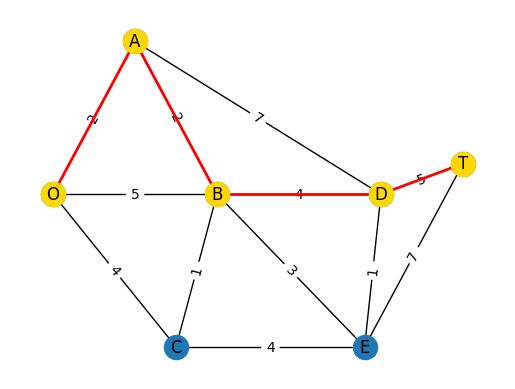

In [20]:
nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})

path_edges = list(zip(shortest_path,shortest_path[1:]))

nx.draw_networkx_nodes(G,pos,nodelist=shortest_path,node_color='gold')
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='red',width=2)
plt.axis("off")
plt.show()

## 2. Minimum Spanning Tree

In [26]:
# Calculate the minimum spanning tree
mst = nx.minimum_spanning_tree(G)

# Get the edges of the MST
mst_edges = list(mst.edges())

[('O', 'A'), ('A', 'B'), ('B', 'C'), ('B', 'E'), ('D', 'E'), ('D', 'T')]

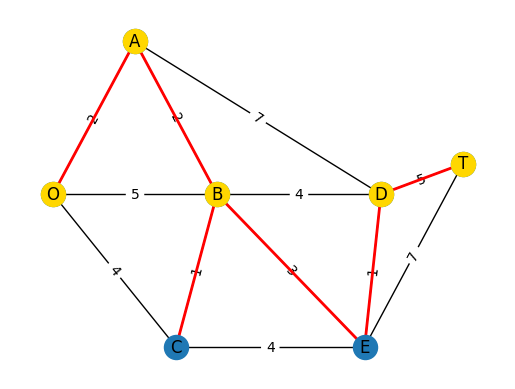

In [25]:
nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})

nx.draw_networkx_nodes(G,pos,nodelist=shortest_path,node_color='gold')
nx.draw_networkx_edges(G,pos,edgelist=mst_edges,edge_color='red',width=2)
plt.axis("off")
plt.show()